# Summary

---
# Setup

In [1]:
# @imports
import sys
sys.path.append("/Users/zsombi/OneDrive/PoPy")
import os

import numpy as np
import pandas as pd
from itertools import product
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import time 

from popy.plotting.plotting_tools import plot_keypoints
import popy.config as cfg
from popy.io_tools import load_metadata, load_neural_data
from popy.neural_data_tools import add_CV

In [2]:
# @Plotting functions

def plot_CVs(df, ylim=None, title=None, ax=None):
    # plot CV, violin plot, 4 different cvs distribution
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 5))

    sns.stripplot(data=df, ax=ax, color='blue', alpha=0.5, zorder=1)
    sns.violinplot(data=df, ax=ax, color='skyblue', alpha=0.5, zorder=2)

    # Overlay mean values using pointplot
    sns.pointplot(data=df, ax=ax, markers='D', color='darkorange', 
                  capsize=0.2, estimator='mean', zorder=3, errorbar=None, linestyles='')
    sns.pointplot(data=df, ax=ax, markers='D', color='darkorange', 
                  capsize=0.2, zorder=3, errorbar=None, linestyles='')
    
    # rotate xlabel
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
    ax.set_ylabel(f'{title.split(" ")[0]}')
    if title is not None:
        ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    if ylim is not None:
        ax.set_ylim(ylim)
    #plt.show()


In [21]:
# @Helper functions

def load_neural_data_custom(monkey, session, cv_mode='mean_rate', epoch='all'):
    neural_data_temp = load_neural_data(monkey, session, return_dataset_format=True)
    #neural_data_temp = set_off_recording_times_to_nan(neural_data_temp, mode=cv_mode)
    neural_data_temp = add_CV(neural_data_temp, mode=cv_mode, epochs=epoch)

    return neural_data_temp

---
# Get data? 

In [4]:
session_metadata = load_metadata()
session_metadata = session_metadata[session_metadata['block_len_valid'] == True]
session_metadata

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,monkey,recording_day,session,depth,session_of_day,position_MCC,position_LPFC,LPFC_spikes_exist,MCC_spikes_exist,behav_file_name,MCC_file_name,LPFC_file_name,interrupted_trials,session_complete,block_len_valid
0,0,0,0,0,ka,2020-05-23,230520,7042,1,gm,ki,False,True,ka230520_gmki_7042001.mat,spk_dataset_MCC_ka230520_001.txt,NaN,1.0,True,True
1,1,1,1,1,ka,2020-06-05,050620,6914,2,ej,jf,True,True,ka050620_ejjf_6914002.mat,spk_dataset_MCC_ka050620_002.txt,spk_dataset_LPFC_ka050620_002.txt,0.0,True,True
2,2,2,2,2,ka,2020-06-08,080620,7621,3,fn,kh,True,True,ka080620_fnkh_7621003.mat,spk_dataset_MCC_ka080620_003.txt,spk_dataset_LPFC_ka080620_003.txt,1.0,False,True
3,3,3,3,3,ka,2020-06-10,100620,7639,1,el,lg,True,True,ka100620_ellg_7639001.mat,spk_dataset_MCC_ka100620_001.txt,spk_dataset_LPFC_ka100620_001.txt,0.0,True,True
4,4,4,4,4,ka,2020-06-16,160620,8565,1,go,lj,True,True,ka160620_golj_8565001.mat,spk_dataset_MCC_ka160620_001.txt,spk_dataset_LPFC_ka160620_001.txt,1.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,124,124,124,124,po,2022-07-20,200722,5782,2,di,le,True,True,po200722_dile_5782002.mat,spk_dataset_MCC_po200722_002.txt,spk_dataset_LPFC_po200722_002.txt,0.0,True,True
125,125,125,125,125,po,2022-07-28,280722,5869,2,gh,pg,True,True,po280722_ghpg_5869002.mat,spk_dataset_MCC_po280722_002.txt,spk_dataset_LPFC_po280722_002.txt,1.0,True,True
126,126,126,126,126,po,2022-08-09,090822,5184,3,gp,ne,True,True,po090822_gpne_5184003.mat,spk_dataset_MCC_po090822_003.txt,spk_dataset_LPFC_po090822_003.txt,0.0,True,True
127,127,127,127,127,po,2022-08-31,310822,5522,1,gj,ld,True,True,po310822_gjld_5522001.mat,spk_dataset_MCC_po310822_001.txt,spk_dataset_LPFC_po310822_001.txt,2.0,True,True


---
# Section 1: Compare models

## An example session

In [5]:
monkey, session = 'ka', '210322'
cv_mode = 'mean_rate'  # 'LVR' or 'CV' or 'mean_rate'

neural_data_temp = load_neural_data_custom(monkey, session, cv_mode=cv_mode)

/var/folders/sc/1kct8wp55hz13v5hhnxrrfy40000gn/T/ipykernel_54867/3370153113.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
/var/folders/sc/1kct8wp55hz13v5hhnxrrfy40000gn/T/ipykernel_54867/3370153113.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


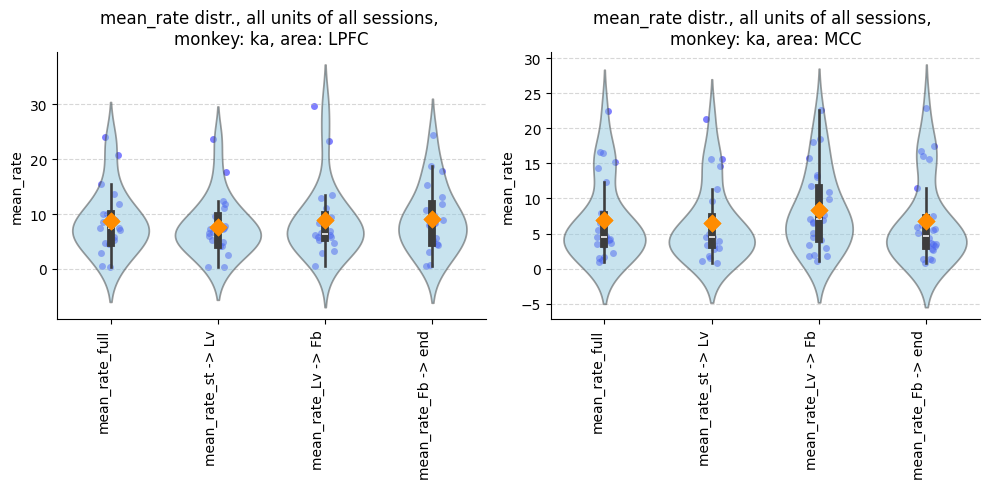

In [6]:
cv_fields = [field for field in neural_data_temp.coords if field.startswith(cv_mode)]
df_temp = pd.DataFrame(columns=cv_fields, data=np.array([neural_data_temp[field].data for field in cv_fields]).T)
df_temp.index = neural_data_temp.unit.data

#plot_CVs(df_temp, title=f'{cv_mode} distr., monkey: {monkey}, session: {session}')
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for area in ['LPFC', 'MCC']:
    df_temp__ = df_temp[df_temp.index.str.contains(area)]
    plot_CVs(df_temp__, title=f'{cv_mode} distr., all units of all sessions, \nmonkey: {monkey}, area: {area}', ylim=None, ax=axs[0 if area == 'LPFC' else 1])
    
plt.tight_layout()

## All sessions

In [7]:
# go through all units of all sessions, collect unit session monkey area name and CV in a dataframe
unit_data = {'unit_name': [],
            f'{cv_mode}_full': [],
            f'{cv_mode}_st -> Lv': [],
            f'{cv_mode}_Lv -> Fb': [],
            f'{cv_mode}_Fb -> end': []}

for (monkey, session), sess_df in session_metadata.groupby(['monkey', 'session']):
    try:
        # load neural data
        neural_data = load_neural_data(monkey, session, mode=None, return_dataset_format=True)
        neural_data = add_CV(neural_data, mode=cv_mode)
        
        unit_data['unit_name'].extend([f'{monkey}_{session}_{unit_name}' for unit_name in neural_data.unit.data])
        for cv_type in [f'{cv_mode}_full', f'{cv_mode}_st -> Lv', f'{cv_mode}_Lv -> Fb', f'{cv_mode}_Fb -> end']:
            unit_data[cv_type].extend(neural_data[cv_type].data)
    except Exception as e:
        #print(f'Error: {e}')
        continue

df = pd.DataFrame(unit_data)
df.index = df['unit_name']
df = df.drop(columns=['unit_name'])

# df, remove rows whith any value greater than 5
#df = df[(df < 5).all(axis=1)]
df

,mean_rate_full,mean_rate_st -> Lv,mean_rate_Lv -> Fb,mean_rate_Fb -> end
unit_name,,,,
ka_030322_LPFC_03_01,1.682444,2.053693,1.886473,1.470369
ka_030322_LPFC_03_02,2.780933,3.312291,3.301706,2.365319
ka_030322_LPFC_04_02,1.881541,2.005903,2.019104,1.778647
ka_030322_LPFC_04_01,6.867034,7.590439,6.801348,6.601540
ka_030322_LPFC_05_03,10.848839,10.320185,8.811284,11.844264
...,...,...,...,...
po_310822_MCC_12_02,2.787608,2.981701,2.811311,2.555513
po_310822_MCC_12_01,3.164377,3.469780,3.136181,2.854708
po_310822_MCC_13_01,3.521487,3.063987,3.719280,3.983676


/var/folders/sc/1kct8wp55hz13v5hhnxrrfy40000gn/T/ipykernel_54867/3370153113.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


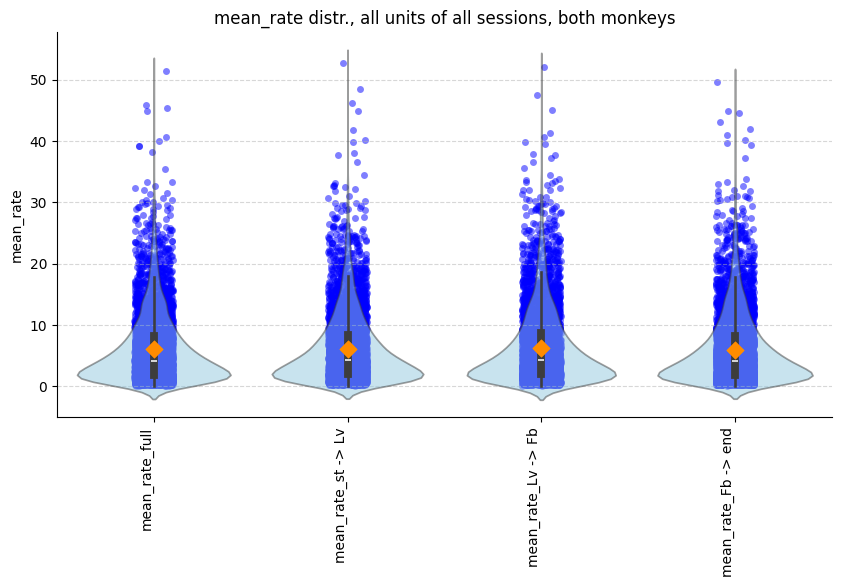

In [8]:
plot_CVs(df, title=f'{cv_mode} distr., all units of all sessions, both monkeys', ylim=None)

/var/folders/sc/1kct8wp55hz13v5hhnxrrfy40000gn/T/ipykernel_54867/3370153113.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
/var/folders/sc/1kct8wp55hz13v5hhnxrrfy40000gn/T/ipykernel_54867/3370153113.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


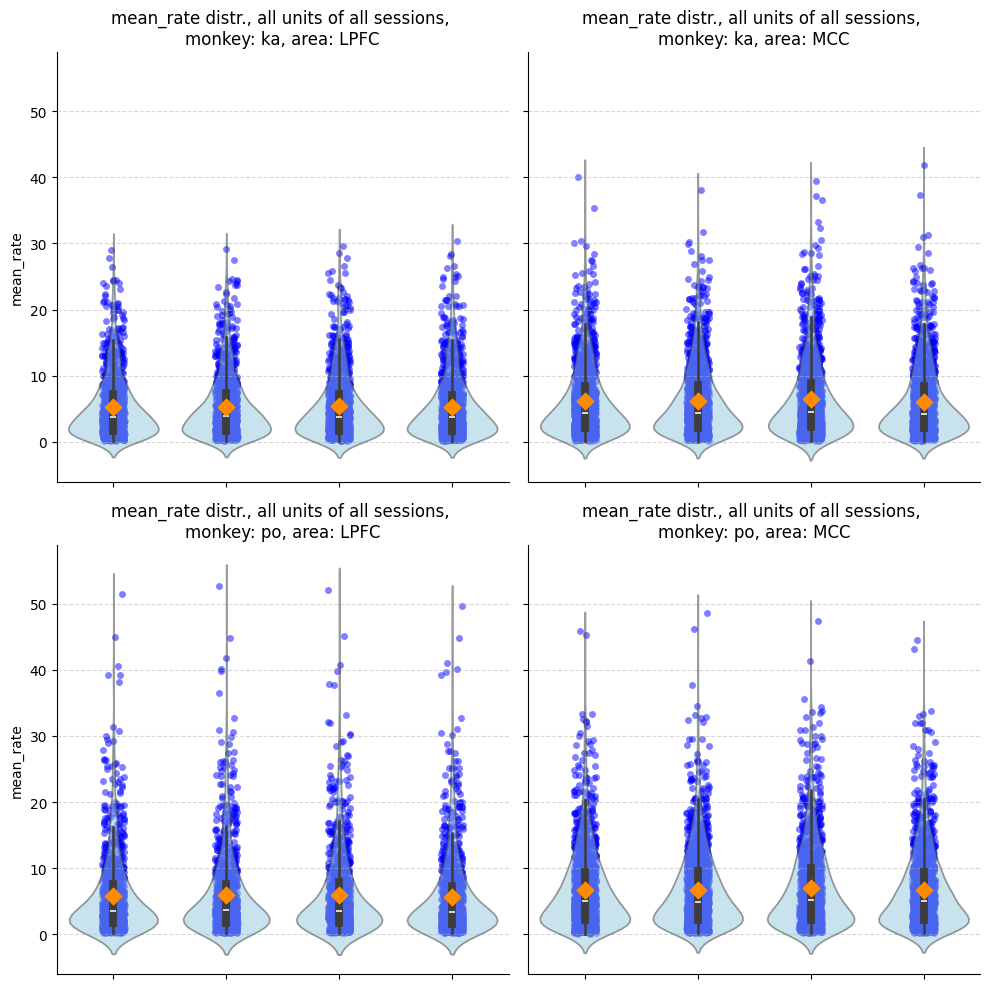

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

for monkey, area in product(['ka', 'po'], ['LPFC', 'MCC']):
    df_temp = df[(df.index.str.startswith(monkey)) & (df.index.str.contains(area))]
    plot_CVs(df_temp, title=f'{cv_mode} distr., all units of all sessions, \nmonkey: {monkey}, area: {area}', ylim=None, ax=axs[0 if monkey == 'ka' else 1, 0 if area == 'LPFC' else 1])
    
plt.tight_layout()


---
# Section 2: CV on the cortical surface

## An example session

In [57]:
# go through all units of all sessions, collect unit session monkey area name and CV in a dataframe
session_mean_CV = []

for (monkey, session), sess_df in session_metadata.groupby(['monkey', 'session']):
    try:
        # load neural data
        neural_data_temp = load_neural_data_custom(monkey, session, cv_mode=cv_mode, epoch='full_only')
        
        # calculate mean CV
        neural_data_temp_mcc = neural_data_temp.sel(unit=neural_data_temp['area'] == 'MCC')
        mean_cv_mcc = neural_data_temp['CV_full'].mean().data
        neural_data_temp_lpfc = neural_data_temp.sel(unit=neural_data_temp['area'] == 'LPFC')   
        mean_cv_lpfc = neural_data_temp_lpfc['CV_full'].mean().data
        session_mean_CV.append({'monkey': monkey, 'session': session, 'mean_cv_mcc': mean_cv_mcc, 'mean_cv_lpfc': mean_cv_lpfc})

        #print(f'{monkey} {session} mean CV MCC: {mean_cv_mcc}, LPFC: {mean_cv_lpfc}')
    except Exception as e:
        #print(f'Error: {e}')
        continue

session_mean_CV = pd.DataFrame(session_mean_CV)
session_mean_CV

/Users/zsombi/Library/CloudStorage/OneDrive-Personal/envs/popy2/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/zsombi/Library/CloudStorage/OneDrive-Personal/envs/popy2/lib/python3.10/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/zsombi/Library/CloudStorage/OneDrive-Personal/envs/popy2/lib/python3.10/site-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/zsombi/Library/CloudStorage/OneDrive-Personal/envs/popy2/lib/python3.10/site-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/zsombi/Library/CloudStorage/OneDrive-Personal/envs/popy2/lib/python3.10/site-packages/numpy/_core/_me

,monkey,session,mean_cv_mcc,mean_cv_lpfc
0,ka,030322,1.35568424631257,1.383992313805376
1,ka,041220,1.2797439231073806,1.1998778367395642
2,ka,050422,1.4619635307616579,1.4715197841869951
3,ka,050620,1.3303234685192722,1.3537930218635852
4,ka,050820,1.3406094192955915,1.4511268410626876
...,...,...,...,...
105,po,280722,1.3445623264283417,1.4241108168852852
106,po,291020,1.3861978407172988,1.3989136908647186
107,po,300322,1.3094376111383692,1.4323985281380225
108,po,300421,1.3692504656320592,1.2832420876979578


In [58]:
session_mean_CV

,monkey,session,mean_cv_mcc,mean_cv_lpfc
0,ka,030322,1.35568424631257,1.383992313805376
1,ka,041220,1.2797439231073806,1.1998778367395642
2,ka,050422,1.4619635307616579,1.4715197841869951
3,ka,050620,1.3303234685192722,1.3537930218635852
4,ka,050820,1.3406094192955915,1.4511268410626876
...,...,...,...,...
105,po,280722,1.3445623264283417,1.4241108168852852
106,po,291020,1.3861978407172988,1.3989136908647186
107,po,300322,1.3094376111383692,1.4323985281380225
108,po,300421,1.3692504656320592,1.2832420876979578


In [26]:
# plot mean CVs over surface

[]

---
# Section 3: CV vs value coding

In [12]:
value_units = {'ka_010720_MCC_05_01': 0.042866941324243846,
 'ka_010720_MCC_07_02': 0.031421737297090524,
 'ka_010720_MCC_08_01': 0.031337329107345324,
 'ka_020622_MCC_06_01': 0.08692512765567761,
 'ka_020622_MCC_09_01': 0.10416637212019464,
 'ka_020622_MCC_10_01': 0.06395394931292908,
 'ka_020622_MCC_15_02': 0.12440460978457302,
 'ka_030322_MCC_08_02': 0.03890058114583095,
 'ka_030322_MCC_09_01': 0.09152686819539235,
 'ka_040321_MCC_09_01': 0.04713319008201433,
 'ka_040321_MCC_10_02': 0.12011985997775754,
 'ka_050620_MCC_08_02': 0.08931168030986747,
 'ka_050620_MCC_08_03': 0.059588386787081005,
 'ka_050620_MCC_09_02': 0.10076562027155733,
 'ka_050820_LPFC_04_01': 0.06853487844193595,
 'ka_050820_LPFC_05_02': 0.07871703555313758,
 'ka_050820_LPFC_06_01': 0.03091478105710499,
 'ka_050820_LPFC_08_01': 0.030953041760930944,
 'ka_050820_LPFC_10_01': 0.034660200773793726,
 'ka_101220_MCC_05_01': 0.0785241587354083,
 'ka_150221_MCC_07_02': 0.06779249917530561,
 'ka_150622_MCC_05_03': 0.3653515934468714,
 'ka_150622_MCC_09_01': 0.031489085544259,
 'ka_150622_MCC_14_03': 0.06522410565559977,
 'ka_190620_MCC_10_02': 0.9999999992964465,
 'ka_200422_MCC_08_01': 0.06422101710148997,
 'ka_200422_MCC_08_02': 0.10484474126461474,
 'ka_200422_MCC_09_03': 0.07372313322578672,
 'ka_200422_MCC_12_01': 0.07174384412095447,
 'ka_200422_MCC_14_02': 0.09537801145465019,
 'ka_210322_MCC_08_03': 0.1324718852651291,
 'ka_210322_MCC_09_01': 0.09653648673242177,
 'ka_210322_MCC_12_01': 0.17387241112944085,
 'ka_240820_MCC_04_02': 0.13126641874517875,
 'ka_300720_MCC_15_02': 0.07844571493739128,
 'ka_300822_MCC_12_01': 0.07354661713612731,
 'ka_300822_MCC_13_01': 0.04547555123799518,
 'po_031220_MCC_03_03': 0.13206235403740163,
 'po_031220_MCC_08_01': 0.10371057513819681,
 'po_050922_MCC_06_01': 0.05386684901768635,
 'po_071021_LPFC_16_01': 0.13028021851989835,
 'po_080920_LPFC_15_01': 0.143386979545296,
 'po_090721_LPFC_11_01': 0.05602689291905549,
 'po_090721_MCC_09_02': 0.122316954483767,
 'po_111220_LPFC_13_02': 0.2717950127535885,
 'po_120121_MCC_05_03': 0.06632543849322547,
 'po_140121_MCC_01_03': 0.24357752406367528,
 'po_141020_LPFC_11_01': 0.11298208705217871,
 'po_160920_MCC_12_01': 0.048419285681692625,
 'po_180920_LPFC_09_01': 0.12269567690073269,
 'po_210422_LPFC_09_01': 0.07957466234685162,
 'po_210422_MCC_02_01': 0.08939318755370418,
 'po_210422_MCC_07_01': 0.05362394662196979,
 'po_210422_MCC_07_02': 0.12188967453955613,
 'po_210422_MCC_09_03': 0.16651590381119163,
 'po_210622_LPFC_15_03': 0.03468559675715488,
 'po_210622_MCC_09_04': 0.05877906262695021,
 'po_300421_MCC_02_01': 0.03648292893403893,
 'po_310822_MCC_02_01': 0.041353866808432005}

value_units = {key: value for key, value in value_units.items() if key in df.index}

/var/folders/sc/1kct8wp55hz13v5hhnxrrfy40000gn/T/ipykernel_54867/3370153113.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
/var/folders/sc/1kct8wp55hz13v5hhnxrrfy40000gn/T/ipykernel_54867/3370153113.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
/var/folders/sc/1kct8wp55hz13v5hhnxrrfy40000gn/T/ipykernel_54867/3370153113.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


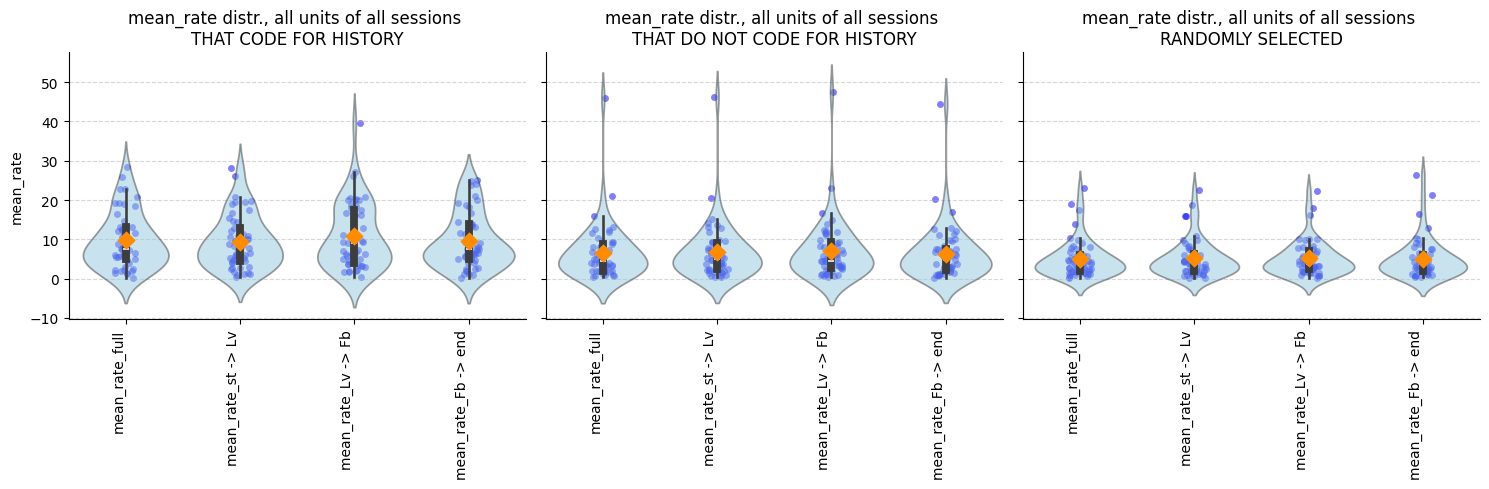

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

# units with value coding
df_value_units = df.loc[value_units.keys()]
plot_CVs(df_value_units, ylim=None, title=f'{cv_mode} distr., all units of all sessions \nTHAT CODE FOR HISTORY', ax=axs[0])

# units with no value coding
df_no_value_units = df.copy().drop(value_units)
df_no_value_units = df_no_value_units.sample(n=len(value_units))
plot_CVs(df_no_value_units, ylim=None, title=f'{cv_mode} distr., all units of all sessions \nTHAT DO NOT CODE FOR HISTORY', ax=axs[1])

# random undersampled units
df_random_units = df.sample(n=len(value_units))
plot_CVs(df_random_units, ylim=None, title=f'{cv_mode} distr., all units of all sessions \nRANDOMLY SELECTED', ax=axs[2])

plt.tight_layout()


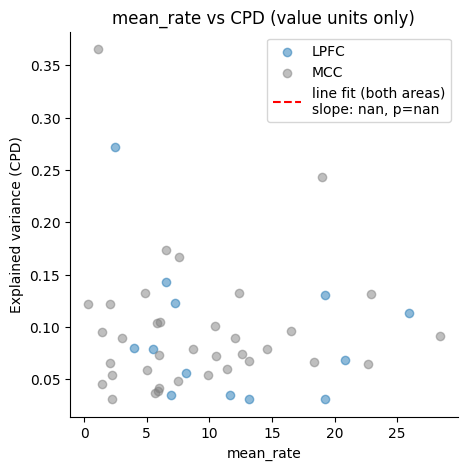

In [14]:
# value units value vs cv
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

cpds = []
cvs = []
areas = []
for unit in value_units:
    cpds.append(value_units[unit])
    cvs.append(df_value_units.loc[unit, f'{cv_mode}_full'])
    areas.append(unit.split('_')[2])
cpds = np.array(cpds)
cvs = np.array(cvs)
areas = np.array(areas)

ax.scatter(cvs[areas == 'LPFC'], cpds[areas == 'LPFC'], color='tab:blue', label='LPFC', alpha=0.5)
ax.scatter(cvs[areas == 'MCC'], cpds[areas == 'MCC'], color='grey', label='MCC', alpha=0.5)

# regression line with p value of significance
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(cvs, cpds)
x = np.linspace(min(cvs), max(cvs), 100)
y = slope * x + intercept
plt.plot(x, y, color='red', linestyle='--', label=f'line fit (both areas)\nslope: {slope:.2f}, p={p_value:.2f}')

ax.set_xlabel(f'{cv_mode}')
ax.set_ylabel('Explained variance (CPD)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# create legend: blue dot is 'LPFC', grey dot is 'MCC'
ax.legend()

ax.set_title(f'{cv_mode} vs CPD (value units only)')
plt.show()